In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

import time

In [16]:
dfr = pd.read_csv('C:\\Users\\Vaider\\Desktop\\PFE\\Travail validée\\MachineLearning_Algos\\Linear regression\\bvmtdata.csv', parse_dates=True)

In [17]:
dfr

,SEANCE,VALEUR,OUVERTURE,PLUS_HAUT,PLUS_BAS,QUANTITE_NEGOCIEE,CAPITAUX,CLOTURE,VARIATION,Unnamed: 9
0,02/01/2020,ADWYA,2.51,2.52,2.47,2607,6487.18,2.52,0.0,NaN
1,02/01/2020,AMEN BANK,29.24,29.68,29.24,5295,155719.95,29.50,0.0,NaN
2,02/01/2020,ARTES,4.88,4.88,4.79,3396,16301.62,4.87,0.0,NaN
3,02/01/2020,ASSAD,7.20,7.20,7.20,260,1872.00,7.20,0.0,NaN
4,02/01/2020,ATB,0.00,0.00,0.00,0,0.00,0.00,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
20591,05/05/2020,UADH,0.58,0.58,0.57,103,59.00,0.57,0.00%,NaN
20592,05/05/2020,UBCI,28.00,28.00,28.00,10,280.00,28.00,-1.06%,NaN
20593,05/05/2020,UIB,16.98,16.99,16.11,142,2371.00,16.70,0.78%,NaN
20594,05/05/2020,UNIMED,9.19,9.19,9.19,1,9.00,9.19,1.10%,NaN


In [18]:
dfr.drop(dfr.columns[[9]], axis = 1, inplace = True)

In [19]:
dfr

,SEANCE,VALEUR,OUVERTURE,PLUS_HAUT,PLUS_BAS,QUANTITE_NEGOCIEE,CAPITAUX,CLOTURE,VARIATION
0,02/01/2020,ADWYA,2.51,2.52,2.47,2607,6487.18,2.52,0.0
1,02/01/2020,AMEN BANK,29.24,29.68,29.24,5295,155719.95,29.50,0.0
2,02/01/2020,ARTES,4.88,4.88,4.79,3396,16301.62,4.87,0.0
3,02/01/2020,ASSAD,7.20,7.20,7.20,260,1872.00,7.20,0.0
4,02/01/2020,ATB,0.00,0.00,0.00,0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...
20591,05/05/2020,UADH,0.58,0.58,0.57,103,59.00,0.57,0.00%
20592,05/05/2020,UBCI,28.00,28.00,28.00,10,280.00,28.00,-1.06%
20593,05/05/2020,UIB,16.98,16.99,16.11,142,2371.00,16.70,0.78%
20594,05/05/2020,UNIMED,9.19,9.19,9.19,1,9.00,9.19,1.10%


In [20]:
data = dfr
data_biat = data[data.VALEUR=='BIAT']

In [36]:
data_biat

,SEANCE,VALEUR,OUVERTURE,PLUS_HAUT,PLUS_BAS,QUANTITE_NEGOCIEE,CAPITAUX,CLOTURE,VARIATION
10,02/01/2020,BIAT,113.50,113.50,112.51,2473,279732.40,112.51,0.0
296,03/01/2020,BIAT,112.50,113.00,112.02,4122,465009.15,112.02,0.0
582,06/01/2020,BIAT,112.01,112.02,111.51,1876,210115.07,111.51,0.0
868,07/01/2020,BIAT,112.00,112.00,111.00,487,54344.61,111.11,0.0
1154,08/01/2020,BIAT,111.15,111.20,111.00,1691,187826.09,111.01,0.0
...,...,...,...,...,...,...,...,...,...
20192,29/04/2020,BIAT,104.99,104.99,101.20,1701,172652.00,101.50,-0.49%
20278,30/04/2020,BIAT,101.21,102.99,101.00,1046,106169.00,101.50,0.00%
20364,02/05/2020,BIAT,101.21,102.99,101.00,1046,106169.00,101.50,0.00%
20450,03/05/2020,BIAT,101.21,102.99,101.00,1046,106169.00,101.50,0.00%


In [37]:
biat_close = data_biat[['CLOTURE']]
biat_close.head()

,CLOTURE
10,112.51
296,112.02
582,111.51
868,111.11
1154,111.01


In [38]:
future_days = 5
biat_close['Prediction'] = biat_close[['CLOTURE']].shift(-future_days)
biat_close['Prediction']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


10       111.05
296      111.05
582      111.00
868      111.39
1154     113.00
          ...  
20192       NaN
20278       NaN
20364       NaN
20450       NaN
20536       NaN
Name: Prediction, Length: 86, dtype: float64

In [39]:
X = np.array(biat_close.drop(['Prediction'], 1))[:-future_days]
print(X)

[[112.51]
 [112.02]
 [111.51]
 [111.11]
 [111.01]
 [111.05]
 [111.05]
 [111.  ]
 [111.39]
 [113.  ]
 [112.3 ]
 [113.65]
 [111.61]
 [113.6 ]
 [113.5 ]
 [112.7 ]
 [112.71]
 [112.9 ]
 [113.  ]
 [113.  ]
 [112.52]
 [112.5 ]
 [112.1 ]
 [113.  ]
 [113.5 ]
 [115.  ]
 [114.  ]
 [114.  ]
 [114.  ]
 [115.89]
 [116.2 ]
 [119.  ]
 [120.  ]
 [121.  ]
 [120.98]
 [120.05]
 [120.85]
 [121.  ]
 [120.5 ]
 [120.4 ]
 [119.8 ]
 [119.6 ]
 [119.5 ]
 [119.2 ]
 [118.  ]
 [115.  ]
 [114.01]
 [113.49]
 [113.1 ]
 [112.05]
 [109.  ]
 [103.  ]
 [ 96.92]
 [ 99.8 ]
 [102.  ]
 [105.06]
 [108.21]
 [108.5 ]
 [111.75]
 [110.  ]
 [110.  ]
 [109.7 ]
 [108.6 ]
 [105.35]
 [102.19]
 [100.01]
 [102.  ]
 [102.  ]
 [102.  ]
 [101.6 ]
 [102.  ]
 [102.  ]
 [102.  ]
 [102.  ]
 [103.5 ]
 [102.5 ]
 [102.  ]
 [102.5 ]
 [102.01]
 [103.22]
 [102.  ]]


In [45]:
y = np.array(biat_close['Prediction'])[:-future_days]
print(y)

[111.05 111.05 111.   111.39 113.   112.3  113.65 111.61 113.6  113.5
 112.7  112.71 112.9  113.   113.   112.52 112.5  112.1  113.   113.5
 115.   114.   114.   114.   115.89 116.2  119.   120.   121.   120.98
 120.05 120.85 121.   120.5  120.4  119.8  119.6  119.5  119.2  118.
 115.   114.01 113.49 113.1  112.05 109.   103.    96.92  99.8  102.
 105.06 108.21 108.5  111.75 110.   110.   109.7  108.6  105.35 102.19
 100.01 102.   102.   102.   101.6  102.   102.   102.   102.   103.5
 102.5  102.   102.5  102.01 103.22 102.   101.5  101.5  101.5  101.5
 103.8 ]


In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [47]:
#Get the feature data, 
#all the rows from the original data set except the last 'x' days
x_future = biat_close.drop(['Prediction'],1)[:-future_days]
#Get the last 'x' rows
x_future = x_future.tail(future_days)
#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future

array([[102.  ],
       [102.5 ],
       [102.01],
       [103.22],
       [102.  ]])

In [48]:
# Support Vector Machine with a Radial Basis Function as kernel 
from sklearn.svm import SVR
clf_svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
clf_svr.fit(x_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
clf_svr_pred = clf_svr.predict(x_future)

In [50]:
clf_svr_pred

array([102.39675008, 101.90033641, 102.37848593, 102.52731893,
       102.39675008])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


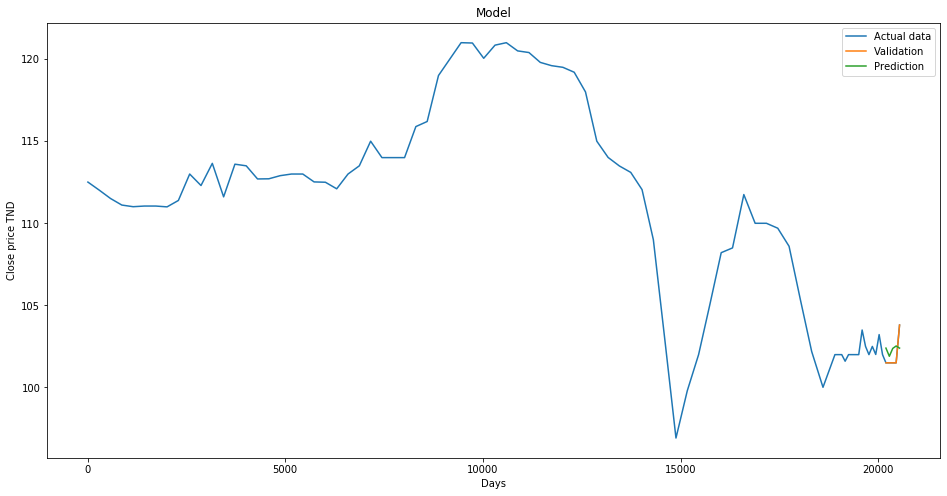

In [51]:
predictions = clf_svr_pred
valid = biat_close[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price TND')
plt.plot(biat_close['CLOTURE'])
plt.plot(valid[['CLOTURE', 'Predictions']])
plt.legend(['Actual data','Validation', 'Prediction'])
plt.show()

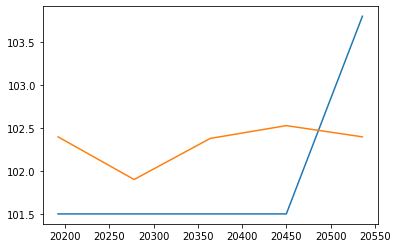

In [52]:
plt.plot(valid[['CLOTURE', 'Predictions']])